In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from SimLib import config_sim as conf
from SimLib import sipm_mapping as DAQ
import sys
#sys.path.append("/home/viherbos/GITHUB/PETALO_analysis")
import fit_library
import scipy.signal as sc
import itertools as it
import multiprocessing as mp
import time
#import TOF_library as T_lib
%matplotlib nbagg
%reload_ext autoreload
%autoreload 2   


# Convolution Test

#timestamp, accu_table, conv_table = TDC.TDC(25,-1,1)   # Event, Time Window for TDC, TE_TDC
#print("%d" % np.min(timestamp[np.argwhere(timestamp>0)]))
fig = plt.figure()
plt.plot(TDC.conv_table[:,2729])
np.argmax(TDC.part_acc)



time = 20000
first_SiPM = 1000
phi_o = np.zeros(Matrix_O.shape)
# Data Matrix Composition
for i in range(Matrix_O.shape[0]):
    for j in range(Matrix_O.shape[1]):
        phi_o[i,j] = accu_table[time,int(Matrix_O[i,j])]

fig = plt.figure(figsize=(10,1.5))
plt.imshow(phi_o)
plt.show()
print(np.min(timestamp[np.argwhere(timestamp>0)])*5)

# Energy Computation Test

Energy = T_lib.ENERGY_compute("/volumedisk0/home/viherbos/DAQ_data/","petit_ring_tof_high_stat.pet.h5",SIPM,Matrix_O)
Energy(100)

# Energy Computation with Multiprocessing

# Multiprocessing
Energy = T_lib.ENERGY_compute("/volumedisk0/home/viherbos/DAQ_data/","petit_ring_tof_high_stat.pet.h5",SIPM,Matrix_O)   

def ENER_comp_wrapper(args):   
    return Energy(args)

pool_size = mp.cpu_count() 
pool = mp.Pool(processes=12)
#pool_output = pool.map(DAQ_map, [i for i in L1_Slice])
pool_output = pool.map(ENER_comp_wrapper, [i for i in range(0,25000)])
pool.close()
pool.join()



Energy_v = np.array([pool_output[i] for i in range(len(pool_output))]).reshape(-1)

fig2 = plt.figure()
fit = fit_library.gauss_fit()
data = Energy_v[Energy_v>100]
fit(data,50)
fit.plot(axis = fig2.add_subplot(111),
     title = "Energy Spectrum (Singles)",
     xlabel = "Photons",
     ylabel = "Hits",
     res=False, 
     fit=True)

In [3]:
TOF_data = np.array(pd.read_hdf('/home/viherbos/DAQ_DATA/NEUTRINOS/PETit-ring/7mm_pitch/TOF_15_2.h5',
                       key='TOF_data',dtype='float'))
TE_range = np.array(pd.read_hdf('/home/viherbos/DAQ_DATA/NEUTRINOS/PETit-ring/7mm_pitch/TOF_15_2.h5',
                       key='TE_range',dtype='float'))


In [4]:

time_bin = 5

def plot_tof(i,fig,TOF_data=TOF_data,TE_range=TE_range,time_bin=time_bin,fit_margins=[15,30],esq=420): 
    data = TOF_data[i,:].reshape(-1) 
    data = np.abs(time_bin*data[(data>-700)*(data<700)])
    sign = [np.random.choice((-1, 1)) for i in range(len(data))]
    data = data*sign
    fit(data,fit_margins)
    fit.plot(axis = fig.add_subplot(esq+i+1),
         title = "Time of Flight TE = "+str(TE_range[i])+"pe",
         xlabel = "Time Stamp in picoseconds",
         ylabel = "Hits",
         res=False, 
         fit=True)
    print("Valid Events = %d" % (data.shape))
    print(fit.bins)

#plot_tof(0)    
#plot_tof(1)
#plot_tof(2)


Valid Events = 1160
16


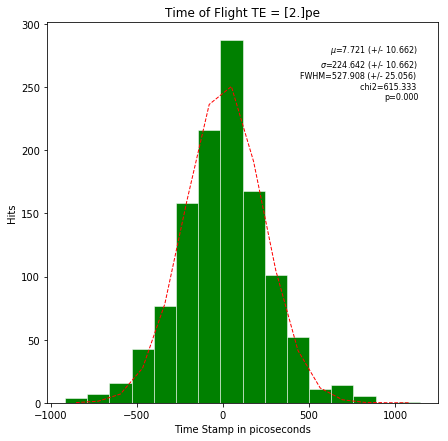

In [7]:
fit = fit_library.gauss_fit()
fig1 = plt.figure(figsize=(7,7)) 
time_bin = 5

plot_tof(1,fig1,fit_margins=[15,30],esq=109)
plt.show()

fit = fit_library.gauss_fit()
fig1 = plt.figure(figsize=(10,10)) 
time_bin = 5

i = 0
data = TOF_data[0,:].reshape(-1) 
data = time_bin*data[(data>-500)*(data<500)]
fit(data,[10,25])
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 1
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-500)*(data<500)]
fit(data,[10,25])
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)

print("Valid Events = %d" % (data.shape))

i = 2
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-500)*(data<500)]
fit(data,[10,25])
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 3
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-500)*(data<500)]
fit(data,[10,25])
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 4
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-600)*(data<600)]
fit(data,[10,25])
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 5
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-600)*(data<600)]
fit(data,'auto')
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 6
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-600)*(data<600)]
fit(data,'auto')
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)
print("Valid Events = %d" % (data.shape))

i = 7
data = TOF_data[i,:].reshape(-1) 
data = time_bin*data[(data>-600)*(data<600)]
fit(data,'auto')
fit.plot(axis = fig1.add_subplot(420+i+1),
     title = "Time of Flight TE = "+str(TE_range[i])+"pe",
     xlabel = "Time Stamp in picoseconds",
     ylabel = "Hits",
     res=False, 
     fit=True)

plt.tight_layout()
print("Valid Events = %d" % (data.shape))